<a href="https://colab.research.google.com/github/MavClarito/Emerging-Tech-1/blob/main/Casidsid%2C_Castillo%2C_Clarito_Activity_9_ORB_Feature_Detection_and_Feature_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**Activity 9** | **ORB Feature Detection and Feature Matching**
**Name** | Casidsid, Judd Amiel
| Castillo, Mark Laurence
| Clarito, Vincent Maverick
**Section** | CPE31S2
**Date Performed**: | 11/11/2023
**Date Submitted**: | 11/12/2023
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform feature detection and feature matching using Oriented FAST and Rotated BRIEF (ORB) algorithm with OpenCV.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Demonstrate the use of oriented FAST and rotated BRIEF algorithm implemented through the use of OpenCV, debugging and modification.
* Evaluate feature detection using Oriented FAST and rotated BRIEF algorithm on images to detect important features.

## 3. Procedures and Outputs

**BEFORE YOU PROCEED WITH THIS SECTION: PLEASE MAKE SURE YOU HAVE READ THE CONTENTS OF THE MODULE REGARDING BRIEF AND FAST**

The team that created ORB (Ethan Rublee, Vincent Rabaud, Kurt Konolige, and Gary R. Bradski) chose to build it on FAST and BRIEF because these two algorithms are fast and efficient.

In their paper, the authors of ORB set out to achieve the following:

* Add a fast and accurate way to determine the orientation of FAST keypoints.
* Find a way to efficiently compute BRIEF features that are also rotation-invariant.
Analyze the variance and correlation of oriented BRIEF features.
* Develop a learning method to decorrelate BRIEF features under rotational invariance, which would improve performance in nearest-neighbor applications.
* In other words, the ORB team wanted to make feature detection and matching faster and more accurate, especially in situations where the training image and query image have different rotations.

The main points of the text are clear, even if you don't understand all of the technical jargon. ORB is a fast and efficient algorithm for feature detection and matching, and it is especially good at matching features that have different rotations.

I bet you are eager to start coding with ORB, so let's move on to some code examples.

Parts of this activity contribute towards the attainment of `ILO1: Demonstrate the use of oriented FAST and rotated BRIEF algorithm implemented through the use of OpenCV, debugging and modification.`

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image1 = cv2.imread('ps4logo.png')
image2 = cv2.imread('ps4console.png')

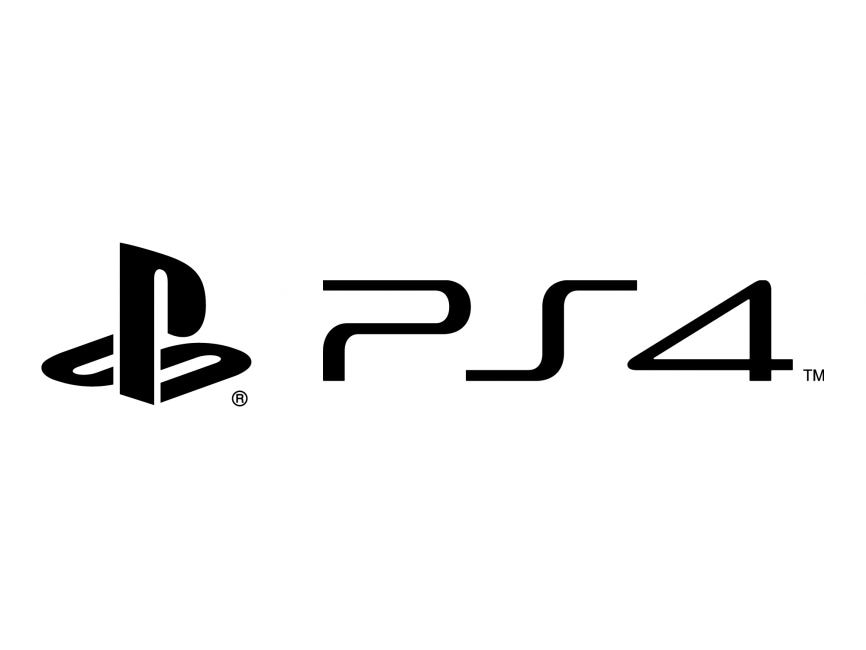

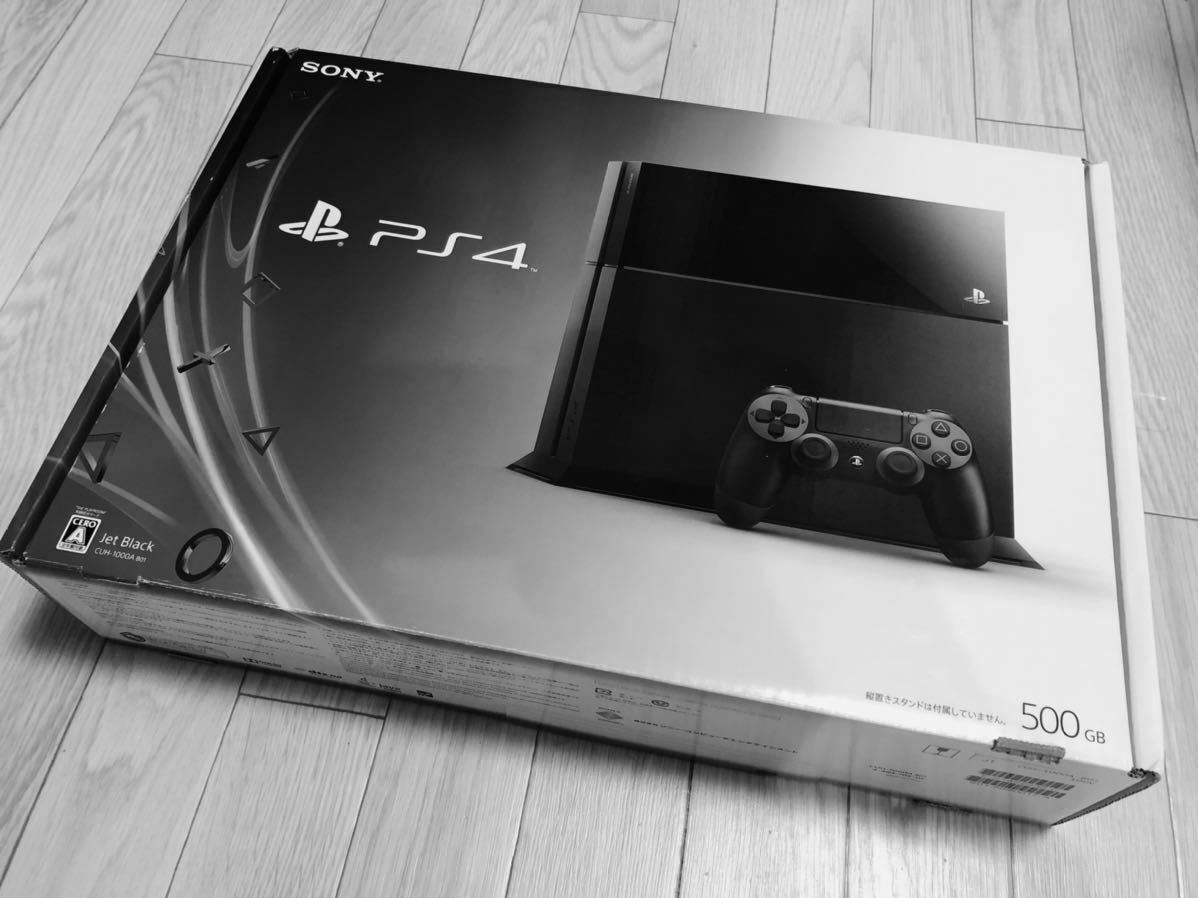

In [ ]:
# Preview the 2 images
cv2_imshow(image1)

cv2_imshow(image2)

In [ ]:
# Create the ORB feature and detector descriptor
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(image1,None) # Reference image
kp2, des2 = orb.detectAndCompute(image2,None)

**Analysis: Explain the purpose of detector and descriptor and why they're used here.**

 An interesting keypoint that is conspicuous or distinctive in the image and appropriate for additional investigation is found by a detector. Upon detecting keypoints using detector, the specific area surrounding each keypoint is identified using descriptors. A keypoint's surrounding region's color distributions and intensity gradients are represented by descriptors.

After analyzing the code, a detector is created using ORB_create(). The image's keypoints can be found using orb.detectAndCompute(), which is also used to compute the keypoints' descriptors.


In [ ]:
"""
The BFMatcher is a simple but effective algorithm for feature matching.
It works by comparing each feature in one image to every feature in the other
image and returning the pair of features with the smallest distance.
"""

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

"""
The match() method takes two arguments:
  - the descriptors of the features in the first image
  - the descriptors of the features in the second image.

It returns a list of matches, where each match is a pair of feature indices,
one from each image.
"""

matches = bf.match(des1,des2)


In [ ]:

"""
Next, we sort the matches in order of their distance.
This ensures that the best matches are returned first.
"""
sorted_matches = sorted(matches, key = lambda x:x.distance)

"""
Then, we draw the top 40 matches between the two images.
The drawMatches() method takes two arguments: the two images, and a list of matches.
It draws lines between the corresponding keypoints in the two images.
"""

image3 = cv2.drawMatches(image1,kp1,image2,kp2, sorted_matches[:40],image2,flags=2)

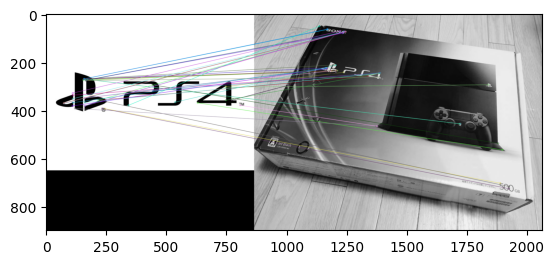

(<matplotlib.image.AxesImage at 0x78a9809c6140>, None)

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(image3),plt.show()

**Question**
- Provide an analysis on the way the ORB algorithm works here, are the results correct? What can/should be improved?

> It matches the keypoints of the two images and visually shows it by different lines. Most are correct but there are some that are matched due to the font style of the company. I think some values can be changed or go through filters to increase accuracy.


## 4. Supplementary Activity

**ILO2: Evaluate feature detection using Oriented FAST and rotated BRIEF algorithm on images to detect important features.**

Perform the following tasks:
1. Find 2 images of brand logos on the internet.
2. Find 5 product images containing one logo each.
3. Test the ORB algorithm to detect and match the features on the images. Document the testing.
4. Evaluate the algorithm's performance, was it able to detect the important features? Was it also reliable in not finding the logos that are not on the provided images?
5. Provide an analysis: Why did it work, or otherwise? What would you change to improve the results if you could?

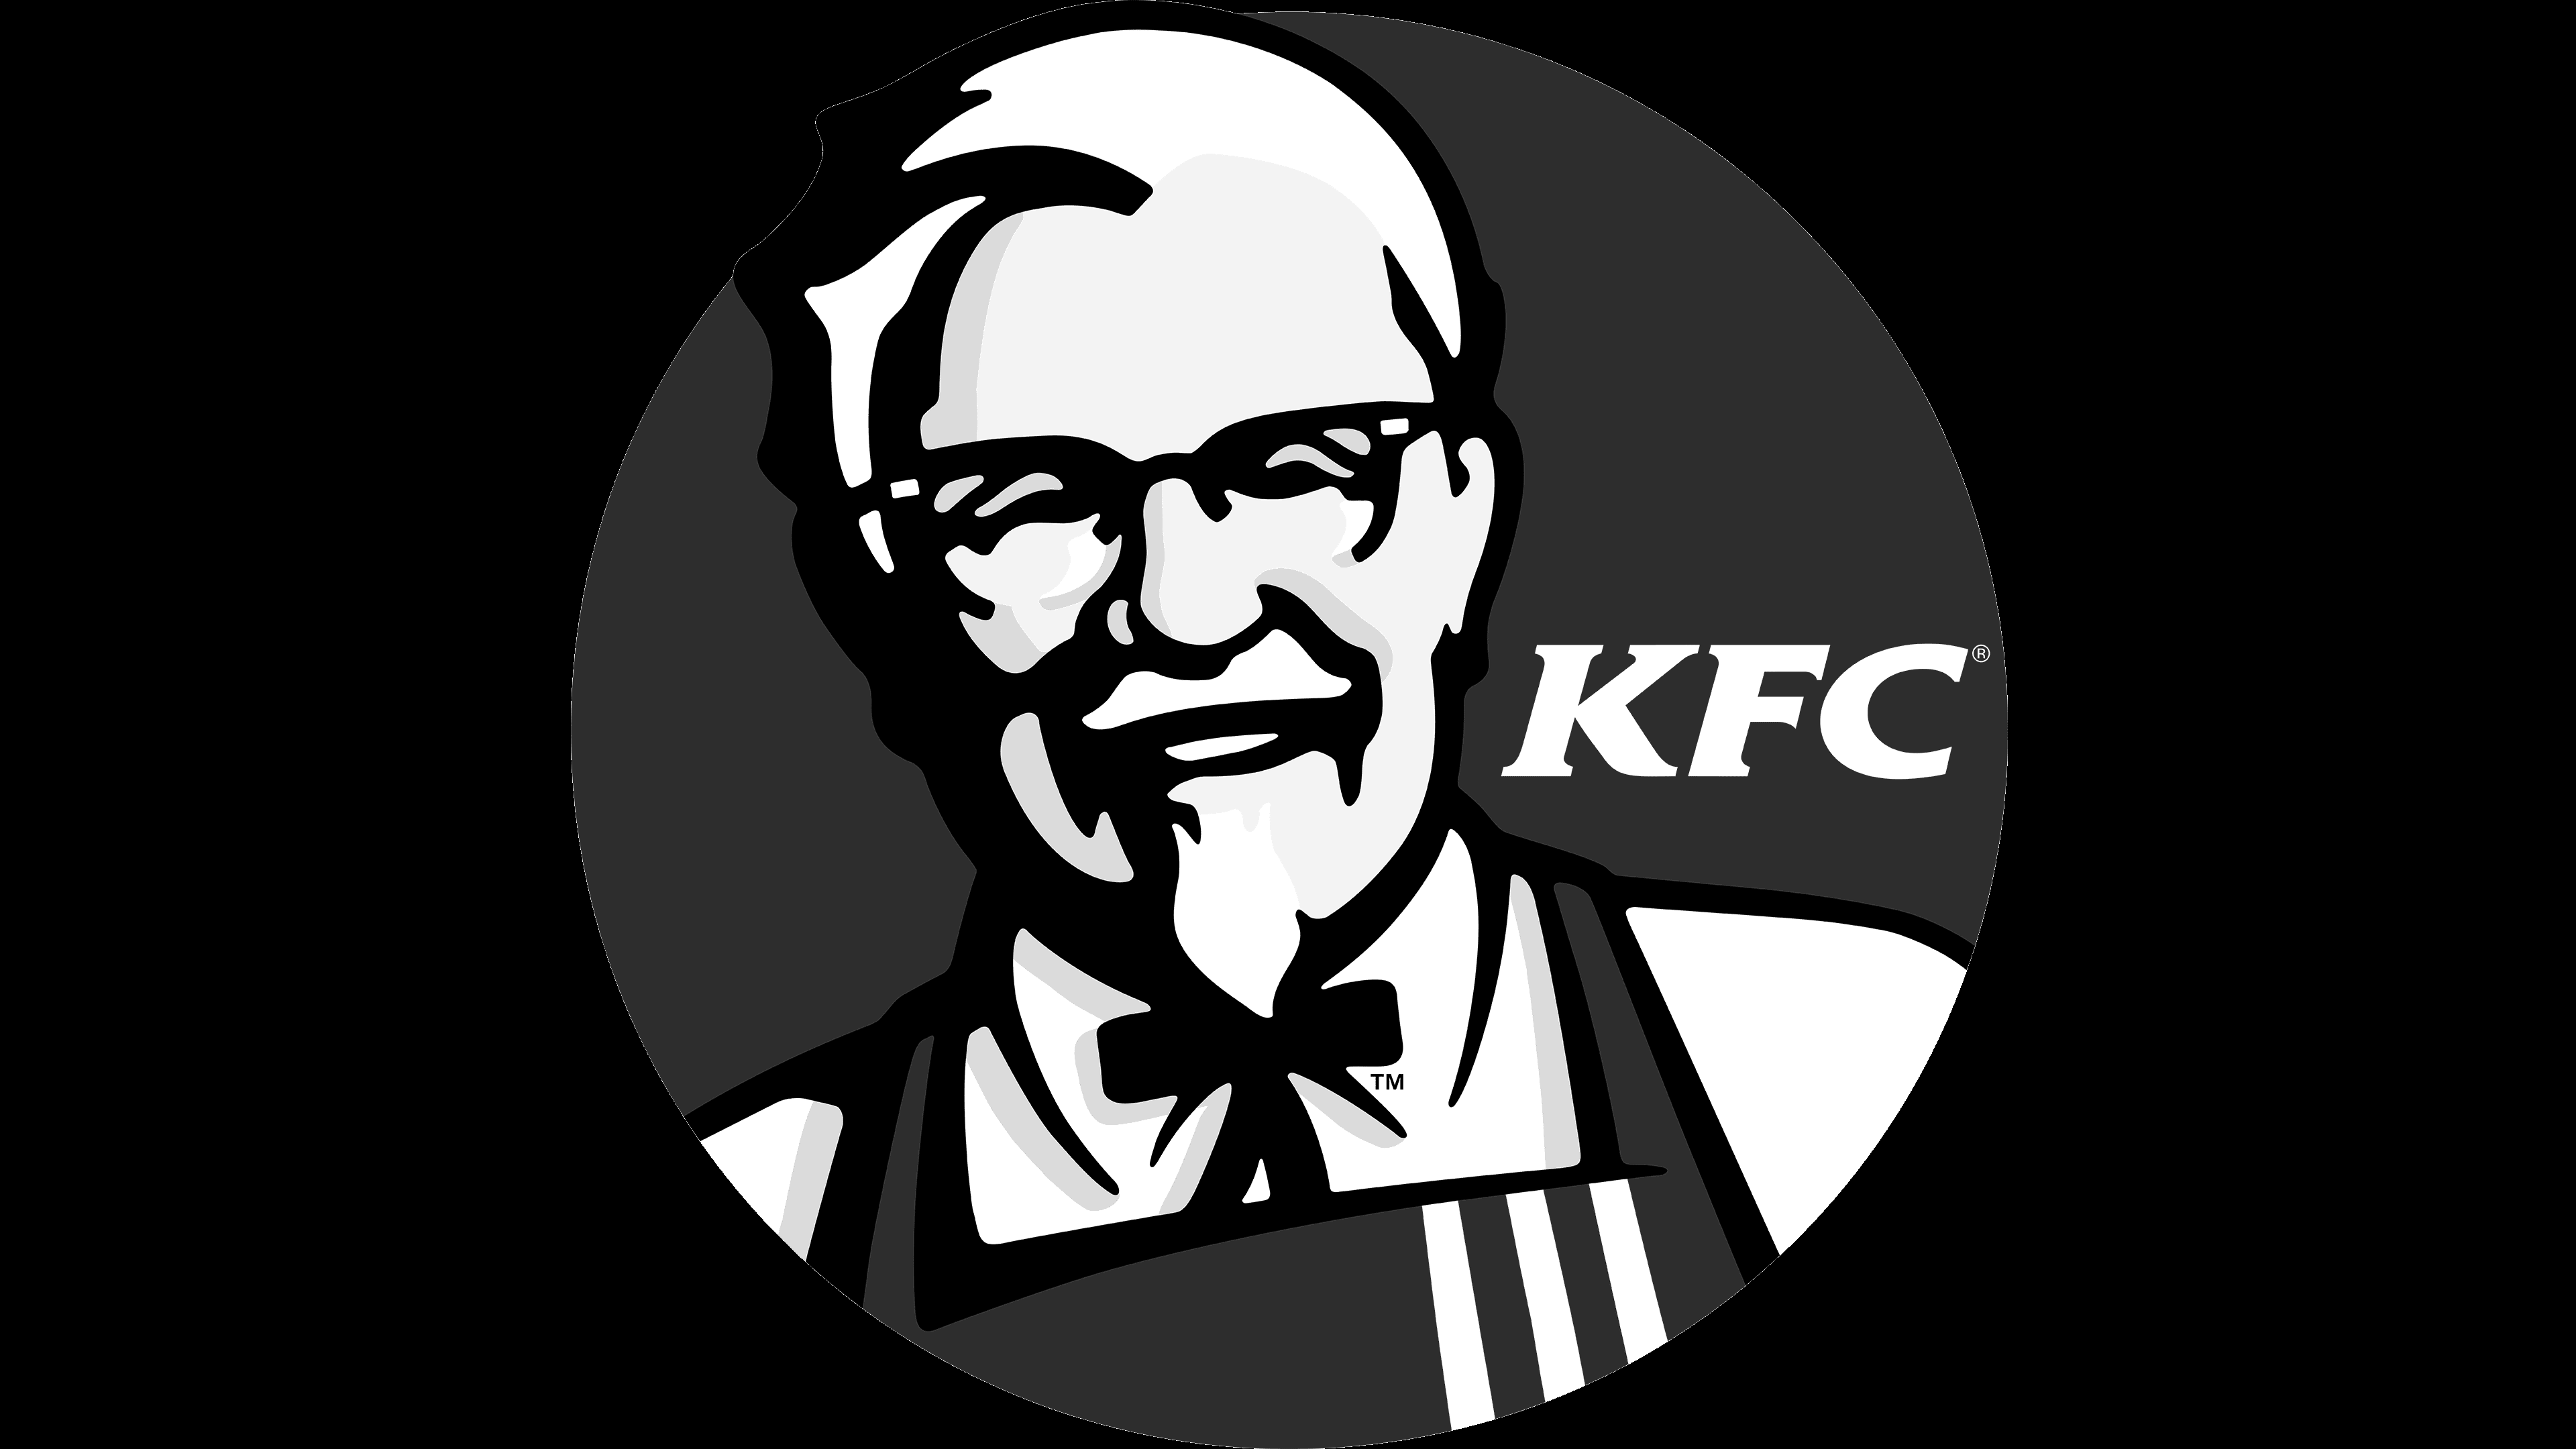

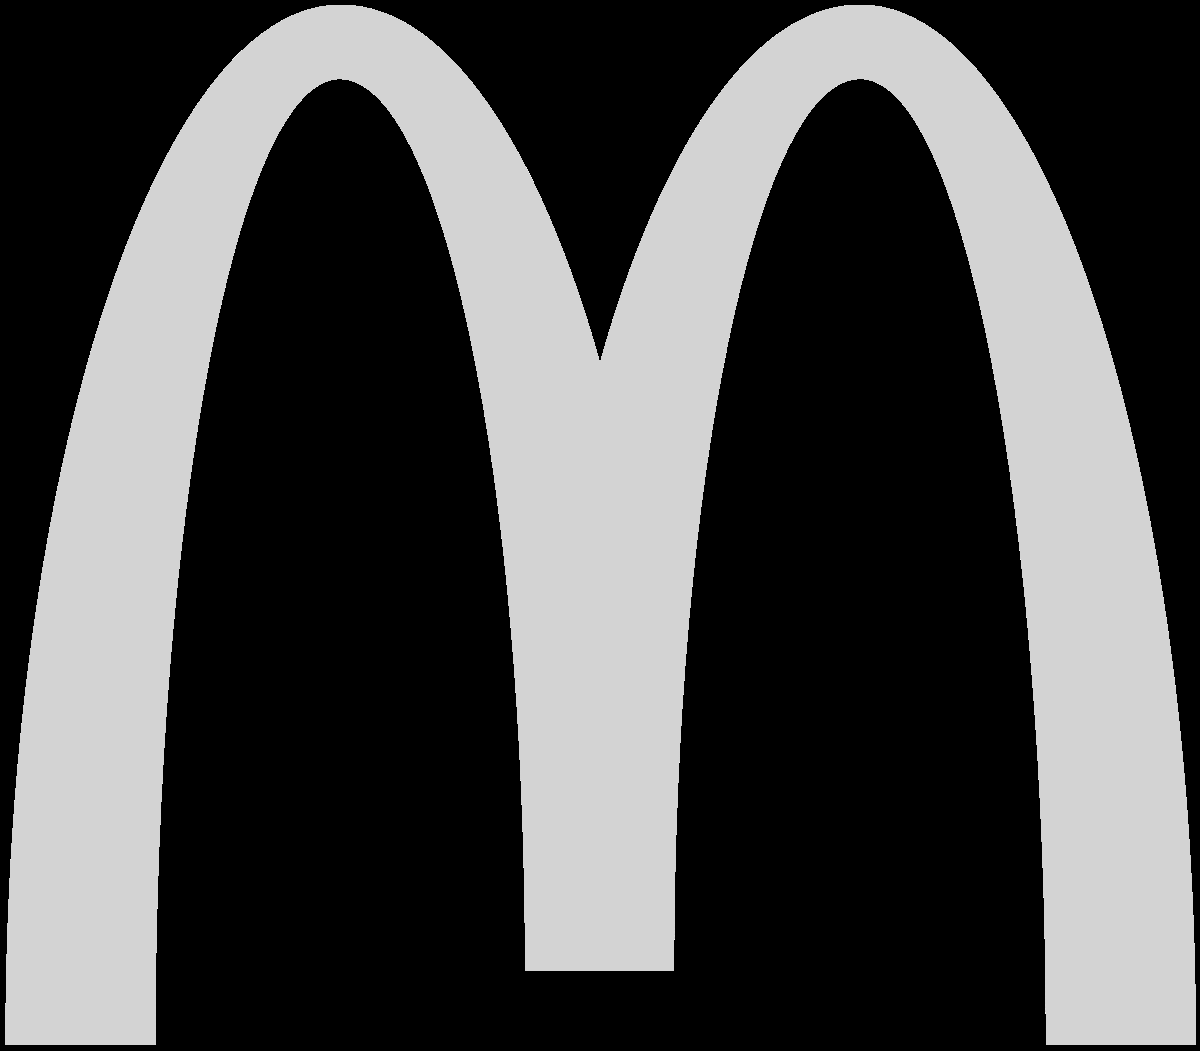

In [ ]:
# Number 1
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

logo1 = cv2.imread('KFClogo.png', cv2.IMREAD_GRAYSCALE)
logo2 = cv2.imread('MCDOlogo.png', cv2.IMREAD_GRAYSCALE)

cv2_imshow(logo1)
cv2_imshow(logo2)

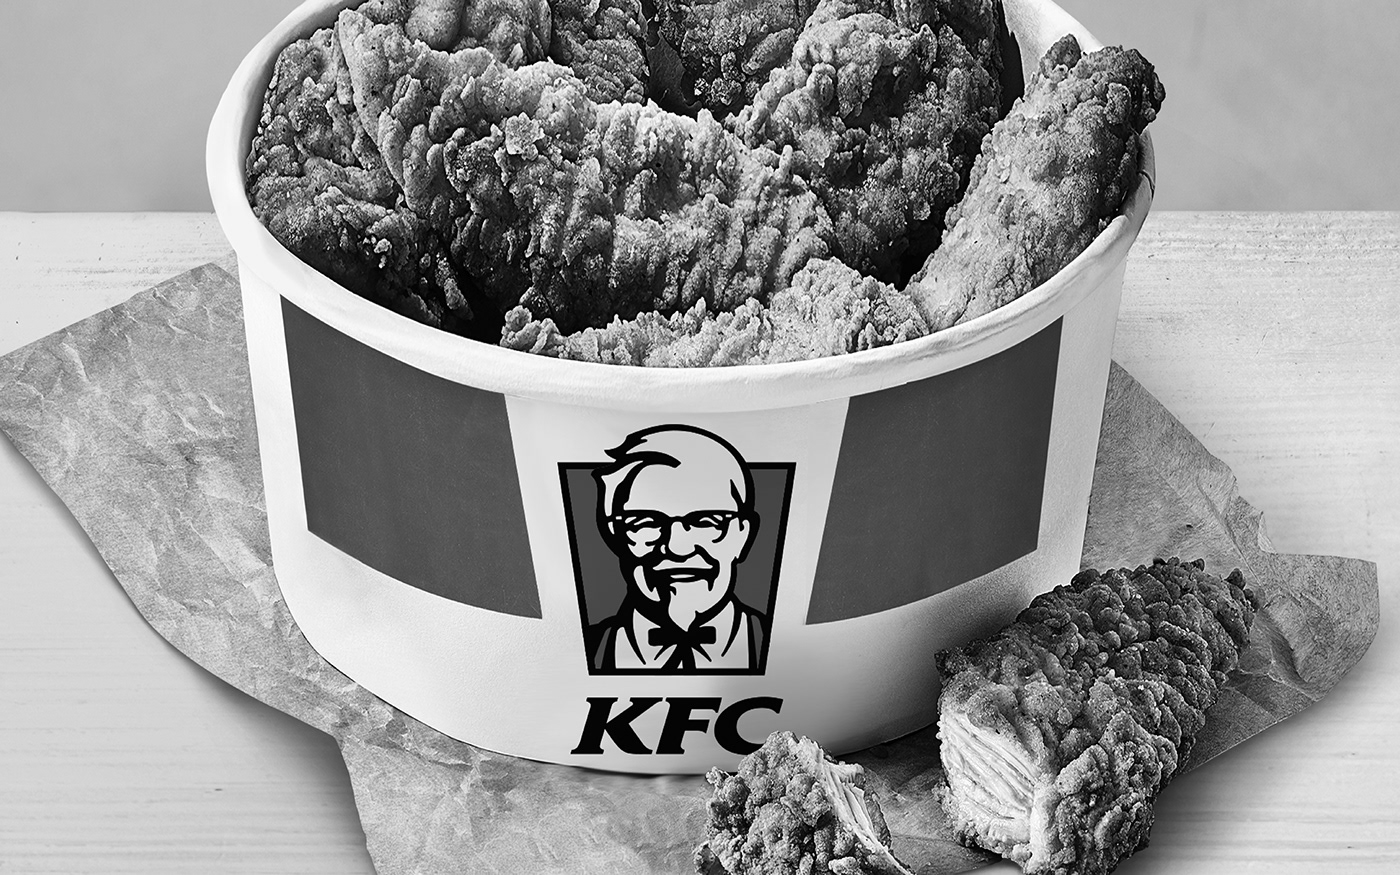

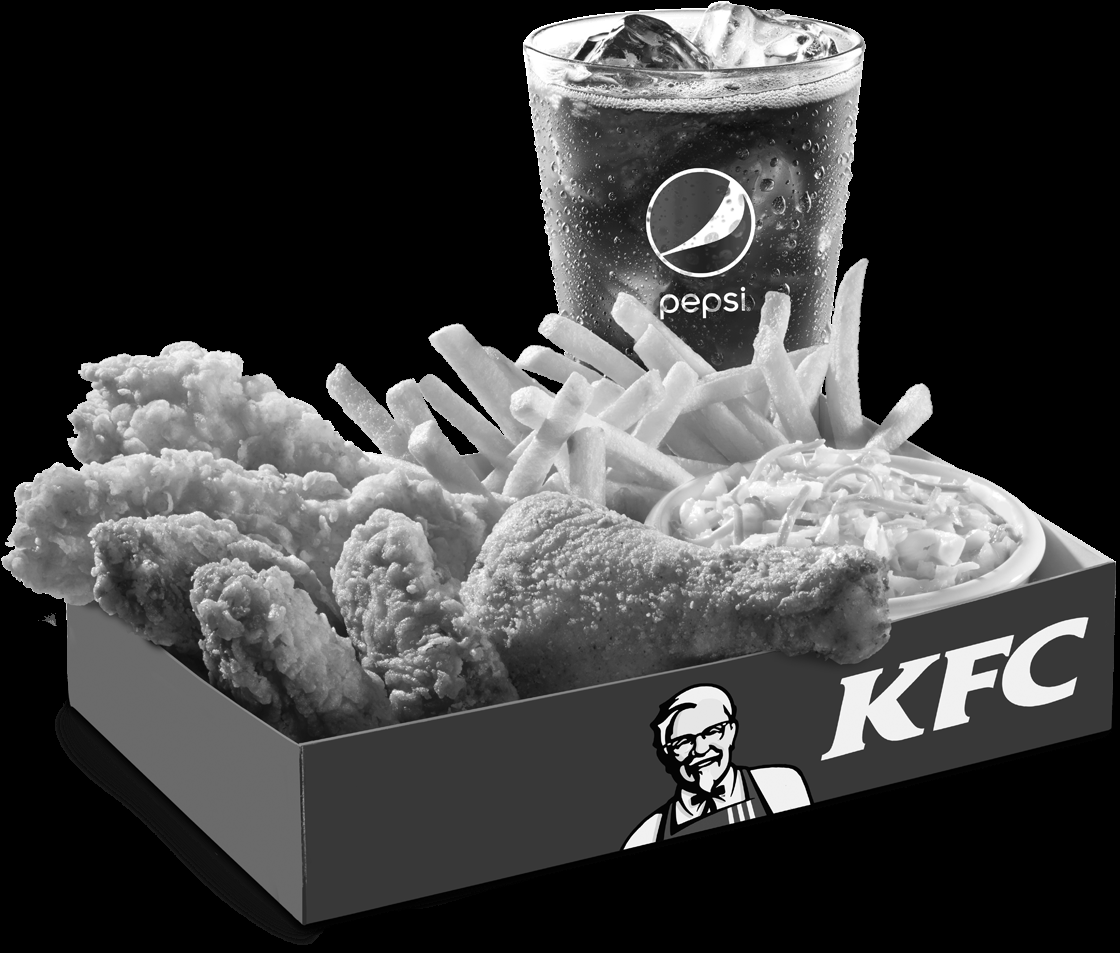

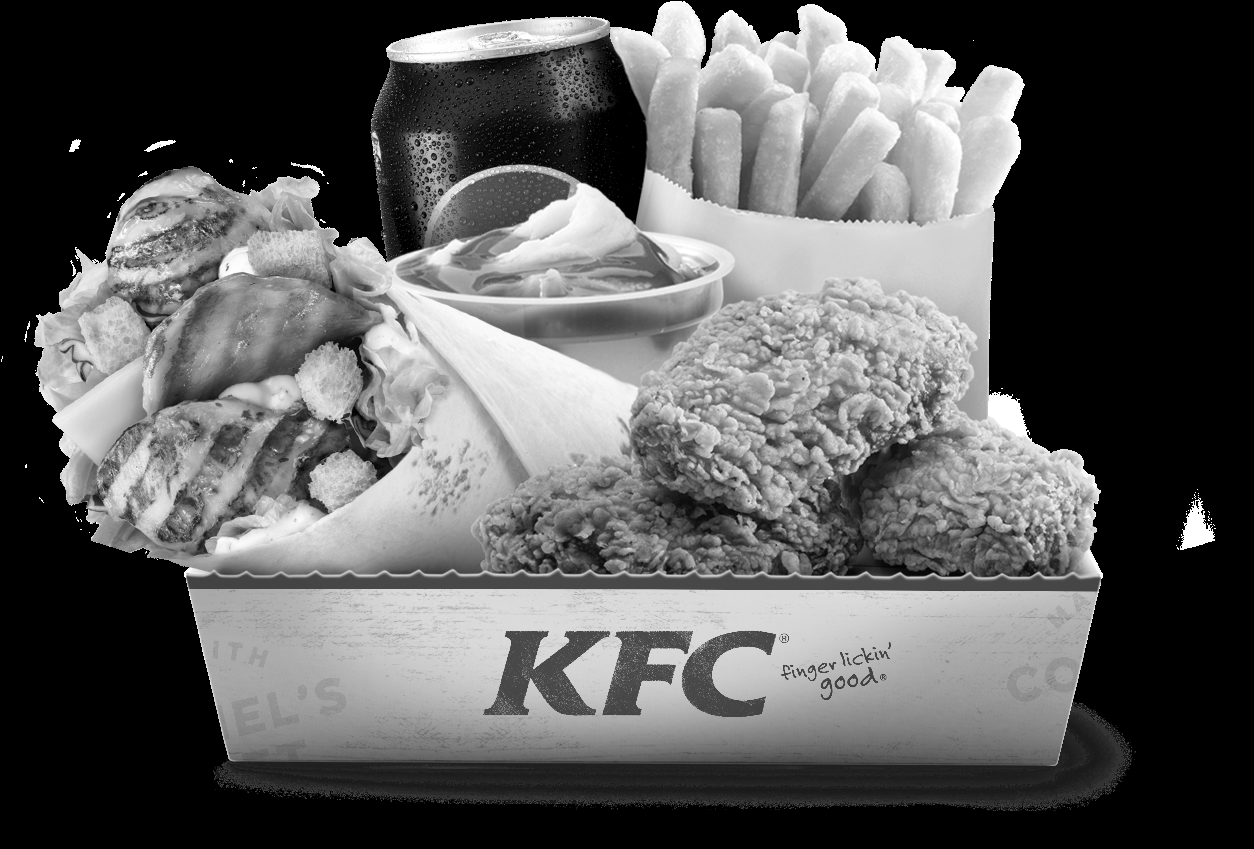

AttributeError: ignored

In [ ]:
# Number 2
KFC1 = cv2.imread('kfc1.jpg', cv2.IMREAD_GRAYSCALE)
KFC2 = cv2.imread('kfc2.png', cv2.IMREAD_GRAYSCALE)
KFC3 = cv2.imread('kfc3.png', cv2.IMREAD_GRAYSCALE)
KFC4 = cv2.imread('kfc1.png', cv2.IMREAD_GRAYSCALE)
KFC5 = cv2.imread('kfc2.png', cv2.IMREAD_GRAYSCALE)

cv2_imshow(KFC1)
cv2_imshow(KFC2)
cv2_imshow(KFC3)
cv2_imshow(KFC4)
cv2_imshow(KFC5)

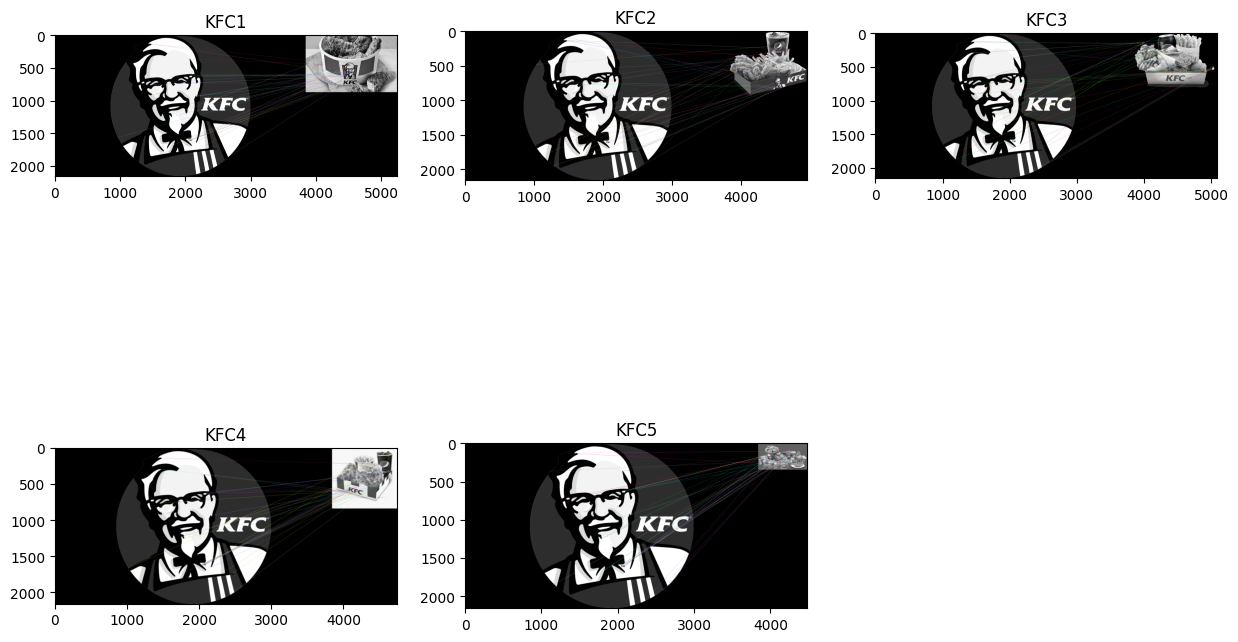

In [ ]:
# Number 3
from matplotlib import pyplot as plt
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(logo1, None)  # Reference image
kp2, des2 = orb.detectAndCompute(KFC1, None)
kp3, des3 = orb.detectAndCompute(KFC2, None)
kp4, des4 = orb.detectAndCompute(KFC3, None)
kp5, des5 = orb.detectAndCompute(KFC4, None)
kp6, des6 = orb.detectAndCompute(KFC5, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches1 = bf.match(des1, des2)
matches2 = bf.match(des1, des3)
matches3 = bf.match(des1, des4)
matches4 = bf.match(des1, des5)
matches5 = bf.match(des1, des6)

sorted_matches1 = sorted(matches1, key=lambda x: x.distance)
sorted_matches2 = sorted(matches2, key=lambda x: x.distance)
sorted_matches3 = sorted(matches3, key=lambda x: x.distance)
sorted_matches4 = sorted(matches4, key=lambda x: x.distance)
sorted_matches5 = sorted(matches5, key=lambda x: x.distance)

image2 = cv2.drawMatches(logo1, kp1, KFC1, kp2, sorted_matches1[:40], None, flags=2)
image3 = cv2.drawMatches(logo1, kp1, KFC2, kp3, sorted_matches2[:40], None, flags=2)
image4 = cv2.drawMatches(logo1, kp1, KFC3, kp4, sorted_matches3[:40], None, flags=2)
image5 = cv2.drawMatches(logo1, kp1, KFC4, kp5, sorted_matches4[:40], None, flags=2)
image6 = cv2.drawMatches(logo1, kp1, KFC5, kp6, sorted_matches5[:40], None, flags=2)

plt.figure(figsize=(15, 10))
plt.subplot(231), plt.imshow(image2), plt.title('KFC1')
plt.subplot(232), plt.imshow(image3), plt.title('KFC2')
plt.subplot(233), plt.imshow(image4), plt.title('KFC3')
plt.subplot(234), plt.imshow(image5), plt.title('KFC4')
plt.subplot(235), plt.imshow(image6), plt.title('KFC5')
plt.show()

In [ ]:
# Number 4

Evaluate the algorithm's performance, was it able to detect the important features? Was it also reliable in not finding the logos that are not on the provided images?

> From the output, it didn't detect important features from the reference picture which is why the performance of this is quite bad.

In [ ]:
# Number 5

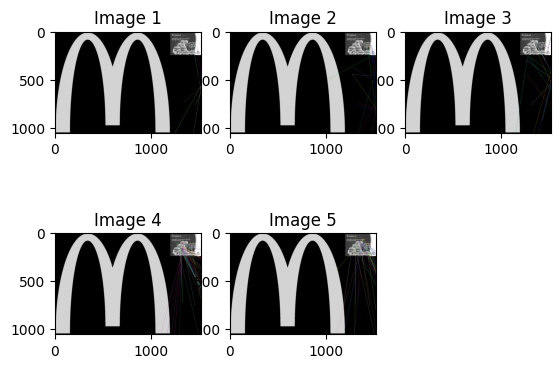

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

logo1 = cv2.imread('KFClogo.png', cv2.IMREAD_GRAYSCALE)
logo2 = cv2.imread('MCDOlogo.png', cv2.IMREAD_GRAYSCALE)

# Read other images
KFC1 = cv2.imread('kfc1.jpg', cv2.IMREAD_GRAYSCALE)
KFC2 = cv2.imread('kfc2.png', cv2.IMREAD_GRAYSCALE)
KFC3 = cv2.imread('kfc3.png', cv2.IMREAD_GRAYSCALE)
MC4 = cv2.imread('mc1.jpg', cv2.IMREAD_GRAYSCALE)
MC5 = cv2.imread('mc2.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

# Detect and compute keypoints and descriptors for the reference image
kp1, des1 = orb.detectAndCompute(logo1, None)

# List of images and their keypoints/descriptors
images = [KFC1, KFC2, KFC3, MC4, MC5]
kp_des_list = []

for img in images:
    kp, des = orb.detectAndCompute(img, None)
    kp_des_list.append((kp, des))

# Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Loop through each image and find matches
for i, (kp, des) in enumerate(kp_des_list):
    matches = bf.match(des1, des)
    sorted_matches = sorted(matches, key=lambda x: x.distance)

    # Draw matches for each image
    matched_image = cv2.drawMatches(logo2, kp1, img, kp, sorted_matches[:40], None, flags=2)

    # Display the matched image
    plt.subplot(2, 3, i+1), plt.imshow(matched_image), plt.title(f'Image {i+1}')

plt.show()


Provide an analysis: Why did it work, or otherwise? What would you change to improve the results if you could?

> In my opinion, it worked to a degree since it didn't match the golden arches of mcdonalds to anything in the kfc images, it's accuracy can be improved to stop the ramaining stray matches. An idea that I would like to try is experimenting with filters and scalings. I will try it at a later time and a separate collab.

## 5. Summary, Conclusions and Lessons Learned

Casidsid: After doing this activity, I realized that ORB gives an effective mix of robustness and speed. With the help of the FAST algorithm, ORB effectively identifies important spots of interest, enabling quick image processing in real-time applications.

Castillo: In conclusion, we learned in this activity the code and implementation of ORB matching algorithm. We used it on various objects and thier companies logo and see the workings of the algorithm, matching keypoints and features of the images.

Clarito: The code I learned from the discussion and implementation of it utilizes the ORB feature matching algorithm to detect and visualize matches between a reference KFC logo and multiple KFC product images. The code addresses key issues, ensuring proper matching and display of keypoints for each KFC image.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*